**Reference**:
- [Martin Stats Lecture: Bootstrapping](https://www.youtube.com/watch?v=O_Fj4q8lgmc)
- Read chapter 2: Bootstrapping from the book "Practical statistics for data science"
- [Data Science Specialization John Hopkins: Bootstrapping and Permutation Test](https://www.youtube.com/watch?v=o0-_i_kH0I0)

# 1. Why using Bootstrap

- If we do not have large sample size n or CANNOT assume the sampling distribution is normal
- It is difficult to work out the standard error of the estimate

# 2. Why bootstrap works?

- [stack exchange: why bootstrap work?](https://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works#:~:text=Bootstrap%20works%20because%20it%20computationally,study%20individuals%2C%20thus%20collecting%20samples.)

Think as each time we bootstrap, it is like we redraw a sample from the entire population (technically, this is not true)

# 3. Simulation

True population: $X \sim N(\mu = 10, \sigma = 4)$

In [40]:
set.seed(42)
sample_size <- 50

sample_data <- rnorm(sample_size, mean = 10, sd = 2)

Sampling distribution of sample mean (obtained by using simulation)

In [41]:
nsims <- 10000
simulated_sample_mean <- replicate(nsims, mean(rnorm(sample_size, mean = 10, sd = 2)))

# the mean of sample mean 
mean(simulated_sample_mean)

[1] 9.999901

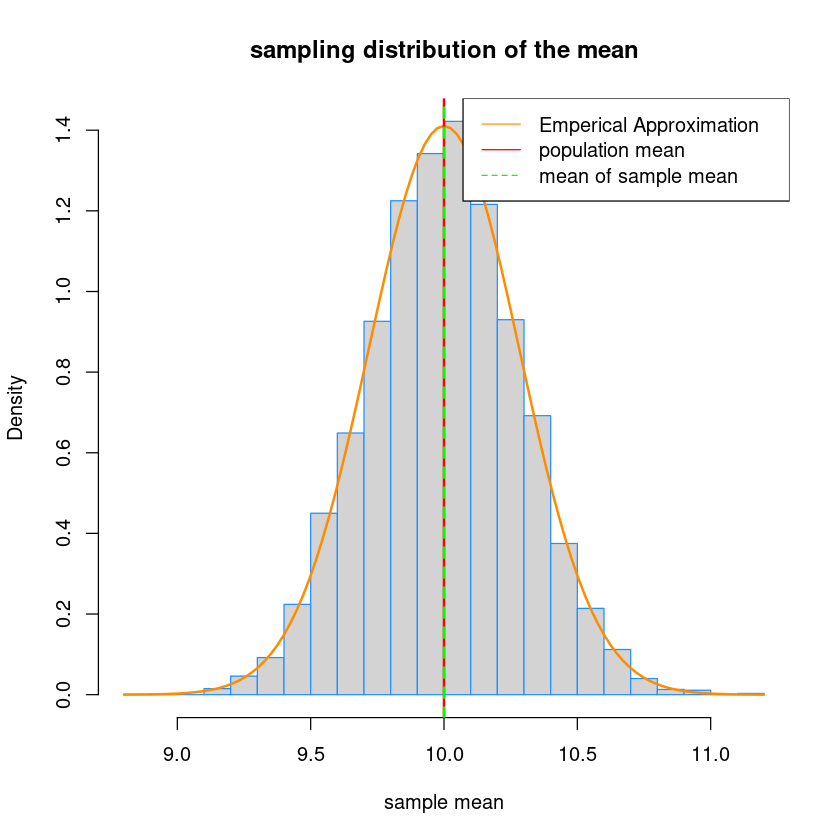

In [43]:
hist(simulated_sample_mean, prob = T, border = "dodgerblue", breaks = 20,
     xlab = "sample mean", main = "sampling distribution of the mean")
curve(dnorm(x, mean = 10, sd = 2 / sqrt(sample_size)), add = T, lwd = 2, col = "darkorange")
abline(v = 10, lwd = 2, col = "red")
abline(v = mean(simulated_sample_mean), lwd = 2, col = "green", lty = 2)
legend("topright", c("Emperical Approximation", "population mean", "mean of sample mean"), 
       lty = c(1, 1, 2), col = c("darkorange", "red", "green"))

Think of bootstrapping as each time we bootstrap, we sample from the popuplation again

In [44]:
n_boot <- 10000
boot_size <- 50

bootstrap_sample_mean <- replicate(10000, mean(sample(sample_data, size = boot_size, replace = T)))

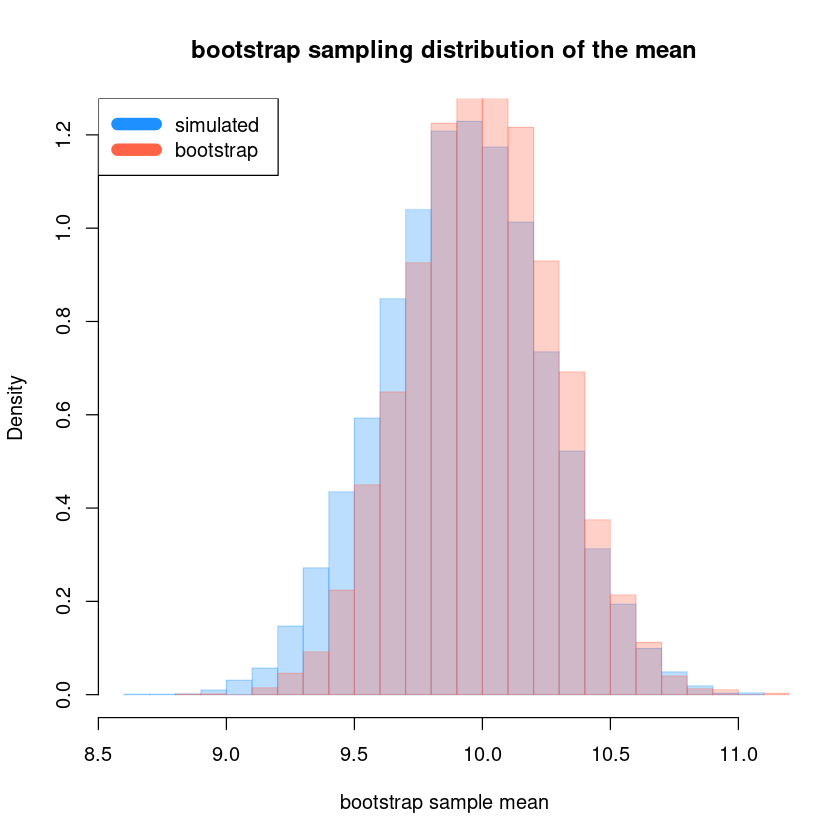

In [77]:
boot_col <- scales::alpha("dodgerblue", 0.3)
sim_col <- scales::alpha("tomato", 0.3)
hist(bootstrap_sample_mean, breaks = 20, prob = T,
     col = boot_col, border = boot_col, 
     xlab = "bootstrap sample mean", main = "bootstrap sampling distribution of the mean")
hist(simulated_sample_mean, prob = T, breaks = 20, add = T, 
     col = sim_col, border = sim_col)
legend("topleft", c("simulated", "bootstrap"), col = c("dodgerblue", "tomato"), lwd = 10)

In [44]:
# population mean
10
# mean of simulated sample mean
mean(simulated_sample_mean)
# mean of boostrapped sample mean
mean(bootstrap_sample_mean)

[1] 10

[1] 9.999901

[1] 9.9263

In [53]:
# standard deviation of bootstrapped sample mean
sd(bootstrap_sample_mean)
# standard deviation simulated sample mean
sd(simulated_sample_mean)

[1] 0.319225

[1] 0.2835565

# 4. Confidence Interval by using bootstrap

95% confidence interval by using bootstrapping

In [79]:
quantile(bootstrap_sample_mean, c(0.025, 0.975))

2.5%     97.5% 
 9.301195 10.548134

95% confidence from simulated sampling distribution of sample mean

In [80]:
quantile(simulated_sample_mean, c(0.025, 0.975))

2.5%     97.5% 
 9.448977 10.557667

# 5. Hypothesis testing by using bootstrap

## 5.1 The elements of hypothesis testing

**Reference**:
- [Martin Stats Lecture](https://www.youtube.com/watch?v=9STZ7MxkNVg)

- 1. State $H_0$, $H_A$
- 2. Chose test statistic ($t$, $f$, $X_2$, ...)
- 3. Determine the distribution of test statistic
- 4. Convert test statistic to p value

## 5.2 Using Bootstrap for Hypothesis testing

$H_0: \mu = 10$  
$H_1: \mu \ne 10$  
Significant level: $\alpha = 0.05$

In [88]:
x_bar <- mean(sample_data)

x_bar

[1] 9.928656

In [91]:
p.value <- mean(bootstrap_sample_mean <= x_bar) * 2
p.value

[1] 0.9988

# 6. NOTES

Increase the number of re-samples CAN NOT increase the amount of information about the data (analysis is still based on $n$ observations)